In [44]:
"""
Multiobjective model optimization code using the SPOTPY library.
https://spotpy.readthedocs.io/en/latest/Calibration_with_SCE-UA/
"""

import numpy as np
import spotpy
from spotpy.examples.spot_setup_hymod_python import spot_setup
import matplotlib.pyplot as plt

In [45]:
spot_setup=spot_setup(spotpy.objectivefunctions.bias)

In [46]:
sampler=spotpy.algorithms.sceua(spot_setup, dbname='SCEUA_hymod', dbformat='csv')

In [ ]:
#Select number of maximum repetitions
rep=5000
sampler.sample(rep, ngs=7, kstop=3, peps=0.1, pcento=0.1)

In [ ]:
results = spotpy.analyser.load_csv_results('SCEUA_hymod')
results

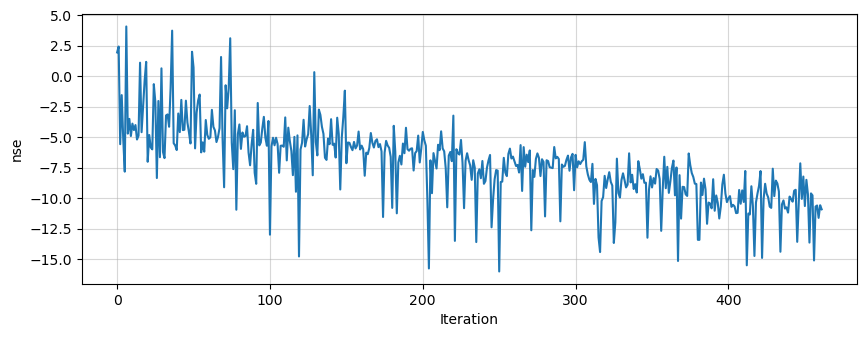

In [49]:
fig,ax=plt.subplots(figsize=(10,3.5))
plt.plot(results['like1'])
plt.ylabel('nse')
plt.xlabel('Iteration')
plt.grid(alpha=0.5)
#fig.savefig('SCEUA_objectivefunctiontrace.png',dpi=300)

#### Plot best model run

In [52]:
bestindex,bestobjf=spotpy.analyser.get_minlikeindex(results)

Run number 250 has the lowest objectivefunction with: -15.9934


In [53]:
best_model_run = results[bestindex]
best_model_run

(-15.9933815, 1.8899044, 1.7739232, 0.6282867, 0.0800159, 0.49741954, 34.79574, 28.970604, 24.374418, 20.345892, 16.951942, 14.216302, 12.070751, 10.406001, 10.28729, 9.769333, 8.953332, 8.024943, 7.124266, 6.3206553, 5.6317725, 5.049186, 4.555337, 4.132134, 3.7643094, 3.440114, 3.1509135, 2.8904781, 2.6543033, 2.4390728, 2.2422705, 2.0619185, 8.261409, 28.196623, 46.02685, 57.804153, 73.573906, 84.56758, 79.60924, 68.696075, 56.61516, 54.391792, 51.44178, 45.32489, 39.02467, 33.256462, 27.35993, 22.158754, 17.91847, 14.636367, 12.165625, 16.36922, 19.2835, 18.888777, 16.819223, 18.754265, 17.856863, 15.735138, 13.230841, 10.896296, 11.7734585, 22.788298, 26.004108, 24.550463, 20.913849, 16.868504, 13.289261, 10.44947, 8.342073, 6.800535, 5.6955047, 7.3294106, 7.8652587, 10.736184, 12.611871, 12.141357, 10.579279, 9.583729, 8.558207, 7.4915743, 6.3243566, 7.419852, 7.2626944, 6.5890756, 15.021601, 17.30137, 16.338783, 13.835409, 11.047449, 8.588941, 6.6495924, 5.209422, 4.17232, 3.5614

In [54]:
fields=[word for word in best_model_run.dtype.names if word.startswith('sim')]
best_simulation = list(best_model_run[fields])
best_simulation

[34.79574,
 28.970604,
 24.374418,
 20.345892,
 16.951942,
 14.216302,
 12.070751,
 10.406001,
 10.28729,
 9.769333,
 8.953332,
 8.024943,
 7.124266,
 6.3206553,
 5.6317725,
 5.049186,
 4.555337,
 4.132134,
 3.7643094,
 3.440114,
 3.1509135,
 2.8904781,
 2.6543033,
 2.4390728,
 2.2422705,
 2.0619185,
 8.261409,
 28.196623,
 46.02685,
 57.804153,
 73.573906,
 84.56758,
 79.60924,
 68.696075,
 56.61516,
 54.391792,
 51.44178,
 45.32489,
 39.02467,
 33.256462,
 27.35993,
 22.158754,
 17.91847,
 14.636367,
 12.165625,
 16.36922,
 19.2835,
 18.888777,
 16.819223,
 18.754265,
 17.856863,
 15.735138,
 13.230841,
 10.896296,
 11.7734585,
 22.788298,
 26.004108,
 24.550463,
 20.913849,
 16.868504,
 13.289261,
 10.44947,
 8.342073,
 6.800535,
 5.6955047,
 7.3294106,
 7.8652587,
 10.736184,
 12.611871,
 12.141357,
 10.579279,
 9.583729,
 8.558207,
 7.4915743,
 6.3243566,
 7.419852,
 7.2626944,
 6.5890756,
 15.021601,
 17.30137,
 16.338783,
 13.835409,
 11.047449,
 8.588941,
 6.6495924,
 5.209422,

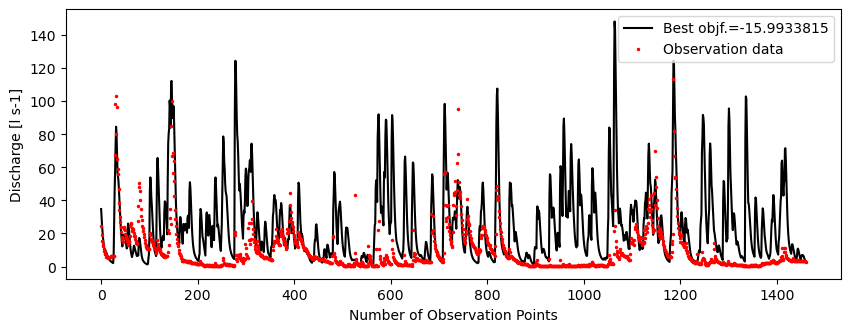

In [55]:
#### Plot best model run
fig= plt.figure(figsize=(10,3.5))
ax = plt.subplot(1,1,1)
ax.plot(best_simulation,color='black',linestyle='solid', label='Best objf.='+str(bestobjf))
ax.plot(spot_setup.evaluation(),'r.',markersize=3, label='Observation data')
plt.xlabel('Number of Observation Points')
plt.ylabel ('Discharge [l s-1]')
plt.legend(loc='upper right')


In [31]:
spot_setup.evaluation()

[24.418331,
 18.871897,
 15.542923,
 13.749797,
 12.432438,
 10.779954,
 9.679059,
 8.504039,
 7.848518,
 7.778211,
 6.871534,
 5.976367,
 5.639718,
 5.482801,
 5.551196,
 5.388404,
 5.226621,
 5.16354,
 5.564683,
 5.957756,
 6.274101,
 6.25,
 6.23,
 6.21,
 6.19,
 6.17,
 6.15,
 6.143736,
 67.386173,
 98.59951,
 80.011049,
 103.328494,
 96.736221,
 65.159635,
 59.196146,
 56.141688,
 46.823822,
 38.530109,
 34.144966,
 30.088306,
 26.788075,
 23.962136,
 20.621056,
 17.775907,
 15.857303,
 14.777229,
 17.461349,
 22.883208,
 23.845093,
 21.86127,
 19.853548,
 18.264846,
 17.236124,
 16.584315,
 15.375273,
 13.871548,
 13.038394,
 14.918089,
 15.247023,
 18.653939,
 24.390232,
 26.492173,
 25.443637,
 23.432959,
 22.280846,
 21.452868,
 22.858965,
 22.082662,
 20.443747,
 18.716441,
 18.244689,
 16.916135,
 15.284938,
 14.00103,
 13.50998,
 14.320551,
 27.354957,
 36.772176,
 48.00298,
 50.356696,
 45.946707,
 40.412788,
 34.953245,
 30.804001,
 27.969613,
 24.805747,
 23.038726,
 21.382

In [32]:
best_simulation

[26.029295,
 21.997635,
 19.148605,
 16.846664,
 14.9704485,
 13.4838295,
 12.3225975,
 11.413396,
 11.346389,
 11.0257845,
 10.510654,
 9.923841,
 9.349672,
 8.826169,
 8.361063,
 7.948313,
 7.5779343,
 7.2404776,
 6.928488,
 6.6365848,
 6.3610644,
 6.0994287,
 5.8499894,
 5.6115785,
 5.383354,
 5.1646757,
 7.023507,
 20.515133,
 33.740555,
 42.86817,
 55.4483,
 64.32761,
 60.671597,
 52.592663,
 43.959373,
 43.214973,
 41.767277,
 37.65705,
 33.347828,
 29.439796,
 25.389696,
 21.831116,
 18.961458,
 16.763836,
 15.1169615,
 18.601595,
 20.910305,
 20.51341,
 18.825134,
 19.984686,
 19.145813,
 17.473305,
 15.602435,
 13.907365,
 14.714973,
 23.359198,
 25.588234,
 24.15921,
 21.193945,
 18.07529,
 15.411203,
 13.344005,
 11.889044,
 10.787669,
 10.004345,
 10.383031,
 10.493741,
 11.306362,
 11.8592205,
 11.388538,
 10.481251,
 9.935165,
 9.320244,
 8.672714,
 8.004349,
 8.224472,
 7.9673495,
 7.580289,
 12.097218,
 13.206998,
 12.5317,
 11.087,
 9.555472,
 8.238479,
 7.2085013,
 6.